# Plukke kort på gata

Sett at du går rundt i verda og finn eitt og eitt spelekort på gata. Kor mange kort må du finna før du har ein fullstendig kortstokk? 


In [15]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import default_rng
rng = default_rng()

## Trekke kort til ein har fullstendig kortstokk

Det første me må laga er ei simulering som trekk eitt og eitt kort heilt til me har ein full kortstokk. Me må og ha kontroll på kor mange kort me har trekt. 

In [6]:
# lager tom liste for dei trekte korta
trekt = []

# trekk eit kort
# viss me ikkje har trekt det før legg me det til i lista
while len(trekt) < 52:
    kort = rng.integers(1, 53)

    if kort not in trekt:
        trekt.append(kort)

Lagar ein funksjon av dette, der me òg held oversikt på kor mange forsøk me har brukt. På denne måten kan me enkelt gjera forsøket mange gongar. 

In [8]:
def trekkeKort():
    trekt = []
    kortnr = 0
    
    while len(trekt) < 52:
        kort = rng.integers(1, 53)
        
        kortnr += 1
        
        if kort not in trekt:
            trekt.append(kort)
    
    return kortnr

In [11]:
trekkeKort()

196

## Rekne ut snittet av fleire forsøk

Me er interessert i å sjå om antall kort ein må trekkja stabiliserer seg rundt eit tal, dersom me repeterer forsøket mange gongar.

In [14]:
A = []
forsøk = 10000

for i in range(forsøk):
    A.append(trekkeKort())

A = np.array(A)
print(f"Gjennomsnitt: {A.mean()}")
print(f"Kortaste tur: {A.min()}")
print(f"Lengeste tur: {A.max()}")

Gjennomsnitt: 235.8608
Kortaste tur: 111
Lengeste tur: 739


## Plotte resultatet (og gjere fleire forsøk)

Reknar ut gjennomsnittet etter N forsøk og plottar gjennomsnittet opp mot antall forsøk. Aukar i tillegg antall forsøk til 1.000.000. Plottar med logaritmisk x-akse. 

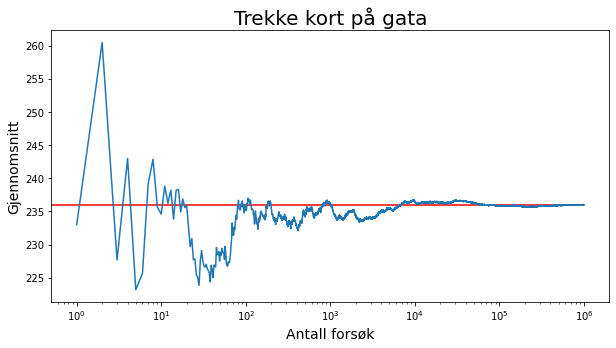

Gjennomsnitt: 236.029602
Kortaste tur: 87
Lengste tur: 911


In [25]:
forsøk = 1000000
A = []

for i in range(forsøk):
    A.append(trekkeKort())

A = np.array(A)

# Antall forsøk (N) og kumulativt gjennomsnitt (n)
N = np.arange(1, forsøk + 1)
n = A.cumsum() / N

# Plotting
plt.figure(figsize=(10,5))
plt.hlines(235.978, 0, forsøk, "r") # teoretisk sannsyn
plt.plot(N, n)
plt.xlabel("Antall forsøk", fontsize = 14)
plt.xscale("log")
plt.ylabel("Gjennomsnitt", fontsize = 14)
plt.title("Trekke kort på gata", fontsize = 20)
plt.show()

print("Gjennomsnitt:", A.mean())
print("Kortaste tur:", A.min())
print("Lengste tur:", A.max())